In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data.xlsx


In [ ]:
import os
os.listdir()


['.config', 'data.xlsx', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_excel("data.xlsx")
df.to_csv("data.csv", index=False)

print("Converted data.xlsx to data.csv")


Converted data.xlsx to data.csv


In [ ]:
%%writefile topsis.py
import sys
import pandas as pd
import numpy as np
import os
def main():
  # 1. Check number of arguments
    if len(sys.argv) != 5:
        print("Error: Incorrect number of parameters")
        sys.exit(1)

    input_file = sys.argv[1]
    weights = sys.argv[2]
    impacts = sys.argv[3]
    output_file = sys.argv[4]

  # File Existence check
    if not os.path.isfile(input_file):
      print("Error: File not found")
      sys.exit(1)

  # Read the Input File
    try:
      data = pd.read_csv(input_file)
    except:
      print("Error: Unable to read input file")
      sys.exit(1)

  # 4. Minimum 3 columns
    if data.shape[1] < 3:
        print("Error: Input file must contain at least 3 columns")
        sys.exit(1)

  # 5. Extract criteria columns
    criteria = data.iloc[:, 1:]

  # 6. Numeric check
    if not np.all(criteria.applymap(np.isreal)):
        print("Error: Non-numeric value found")
        sys.exit(1)

  # 7. Parse weights & impacts
    try:
        weights = list(map(float, weights.split(',')))
        impacts = impacts.split(',')
    except:
        print("Error: Invalid weights or impacts format")
        sys.exit(1)

  # 8. Length check
    if len(weights) != criteria.shape[1] or len(impacts) != criteria.shape[1]:
        print("Error: Number of weights/impacts must match number of criteria")
        sys.exit(1)

  # 9. Impact validation
    for i in impacts:
        if i not in ['+', '-']:
            print("Error: Impacts must be + or -")
            sys.exit(1)

  # TOPSIS
  # Step 1: Normalize
    norm = criteria / np.sqrt((criteria ** 2).sum())

  # Step 2: Weight multiplication
    weighted = norm * weights

  # Step 3: Ideal best & worst
    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(weighted.iloc[:, i].max())
            ideal_worst.append(weighted.iloc[:, i].min())
        else:
            ideal_best.append(weighted.iloc[:, i].min())
            ideal_worst.append(weighted.iloc[:, i].max())

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

  # Step 4: Distance measures (Euclidean)
    s_pos = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
    s_neg = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

 # Step 5: Topsis score
    score = s_neg / (s_pos + s_neg)

# Step 6: Rank
    data['Topsis Score'] = score
    data['Rank'] = data['Topsis Score'].rank(ascending=False, method='dense').astype(int)


 # Save output
    data.to_csv(output_file, index=False)
    print("Output saved to", output_file)

if __name__ == "__main__":
    main()



Overwriting topsis.py


In [ ]:
import pandas as pd
df = pd.read_csv("data.csv")
print("Total columns:", df.shape[1])
print("Criteria columns:", df.shape[1] - 1)
print(df.columns)


Total columns: 6
Criteria columns: 5
Index(['Fund Name', 'P1', 'P2', 'P3', 'P4', 'P5'], dtype='object')


In [ ]:
!python topsis.py data.csv "2,1,3,1,2" "+,-,+,+,-" result.csv


/content/topsis.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not np.all(criteria.applymap(np.isreal)):
Output saved to result.csv


In [ ]:
import pandas as pd
pd.read_csv("result.csv")


,Fund Name,P1,P2,P3,P4,P5,Topsis Score,Rank
0,M1,0.84,0.71,6.7,42.1,12.59,0.725015,2
1,M2,0.91,0.83,7.0,31.7,10.11,0.725762,1
2,M3,0.79,0.62,4.8,46.7,13.23,0.442216,6
3,M4,0.78,0.61,6.4,42.4,12.55,0.696636,3
4,M5,0.94,0.88,3.6,62.2,16.91,0.302535,8
5,M6,0.88,0.77,6.5,51.5,14.91,0.660282,4
6,M7,0.66,0.44,5.3,48.9,13.83,0.506453,5
7,M8,0.93,0.86,3.4,37.0,10.55,0.357811,7


In [ ]:
files.download("topsis.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

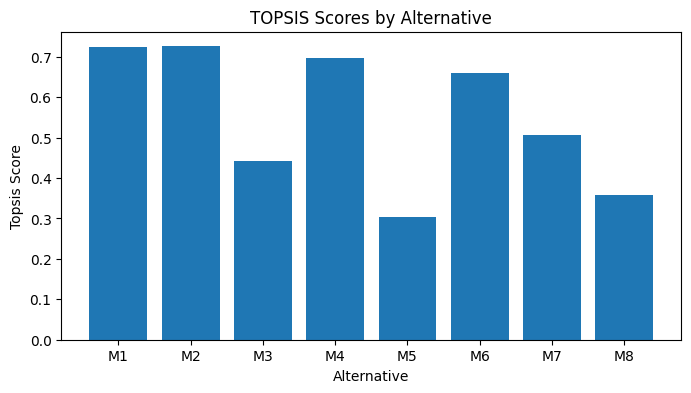

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('result.csv')
plt.figure(figsize=(8,4))
plt.bar(df['Fund Name'], df['Topsis Score'])
plt.xlabel('Alternative')
plt.ylabel('Topsis Score')
plt.title('TOPSIS Scores by Alternative')
plt.show()